# Scientific Approach to Slove Data Science Problems 

#### disclaimer: this material has been presented before to PyData Jeddah.


### Usually, data scientist are presented with business problems to solve. These problems come from a complex domain, such as scheduling vacations for engineers.


<img src="src/business_problem.png" width="500" style="margin-left:auto; margin-right:auto"/>

### the requirement to solve this problem is to prevent high number of delays

# Exercise 1

### plot the numebr of flights and their delays

In [1]:
%matplotlib inline

from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

In [2]:
flight_delays = pd.read_csv("../data/flight_delays.csv", index_col=0, parse_dates=["date"])
flight_delays

,carrier_delay,total_flights
date,,
2018-01-01,1536.90,45384.0
2018-02-01,1348.29,41650.0
2018-03-01,1714.14,49800.0
2018-04-01,1788.42,49937.0
2018-05-01,2211.39,52816.0
2018-06-01,2852.72,55056.0
2018-07-01,3082.90,57209.0
2018-08-01,3372.23,57921.0
2018-09-01,2031.25,52905.0


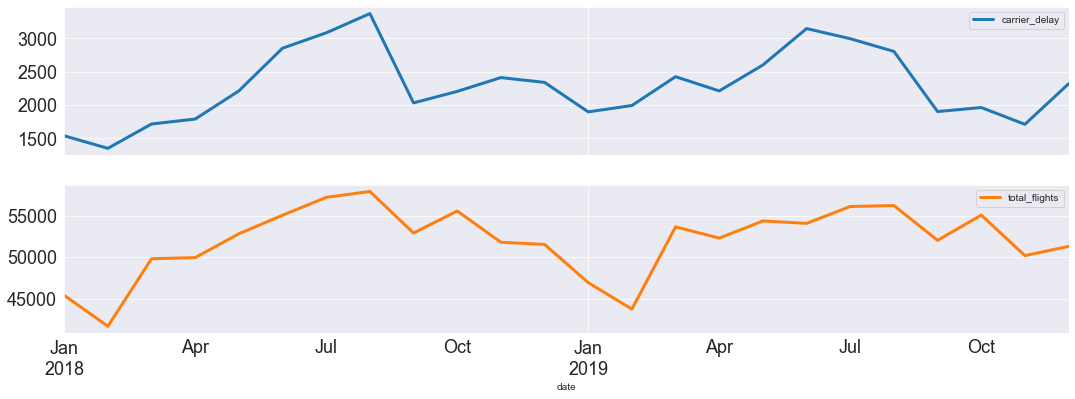

In [3]:
flight_delays.plot(figsize=(18, 6), lw=3, fontsize=18, subplots=True);

### It looks like the number of flights is a good indicator of the number of delays. So, we can build a simple model to predict the delays.

<img src="src/simple_model_rep.png" width="500" style="margin-left:auto; margin-right:auto"/>

# Exercise 2

### build a simple model to predict the delays from number of flights, and plot the preditions.

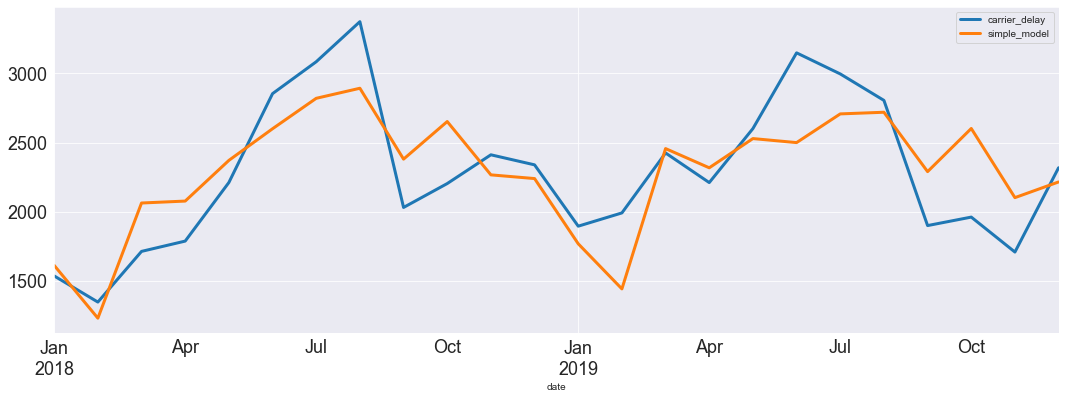

In [4]:
simple_model = LinearRegression().fit(flight_delays[["total_flights"]], flight_delays["carrier_delay"])
flight_delays["simple_model"] = simple_model.predict(flight_delays[["total_flights"]])

(flight_delays[["carrier_delay", "simple_model"]]
 .plot(figsize=(18, 6), lw=3, fontsize=18)
);

### Let us look the problem space again and see if we can use some variables to make the model better

<img src="src/hidden_factors.png" width="500" style="margin-left:auto; margin-right:auto"/>

# Exercise 3

### generate a sine-wave capturing the temprature and plot it against delays

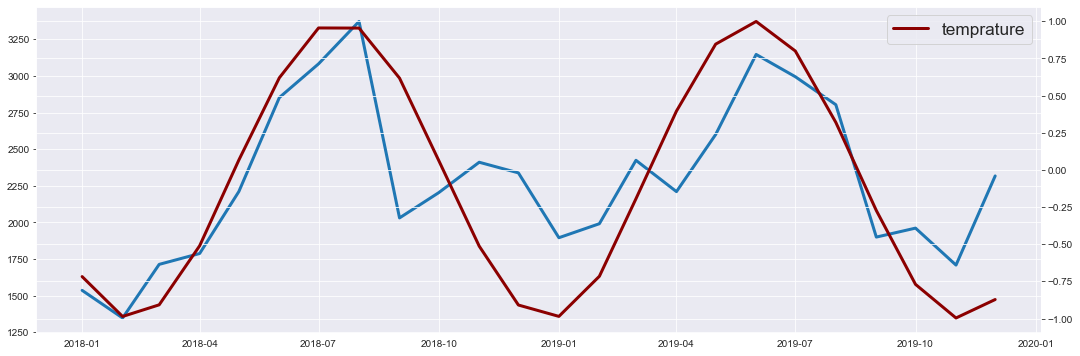

In [5]:
synthetic_x = np.arange(len(flight_delays))
synthetic_wave =  np.sin(-0.8 + -4.6*np.pi*synthetic_x/(len(flight_delays)))

fig, ax = plt.subplots(1, 1, figsize=(18, 6))
ax.plot(flight_delays["carrier_delay"], label="delays", lw=3)
ax.twinx().plot(flight_delays.index, synthetic_wave, label="temprature", lw=3, color="darkred")
plt.legend(fontsize="xx-large");

# Exercise 4

### build a more complex model using the temprature and compare the results

In [6]:
flight_delays["temprature_movement"] = synthetic_wave

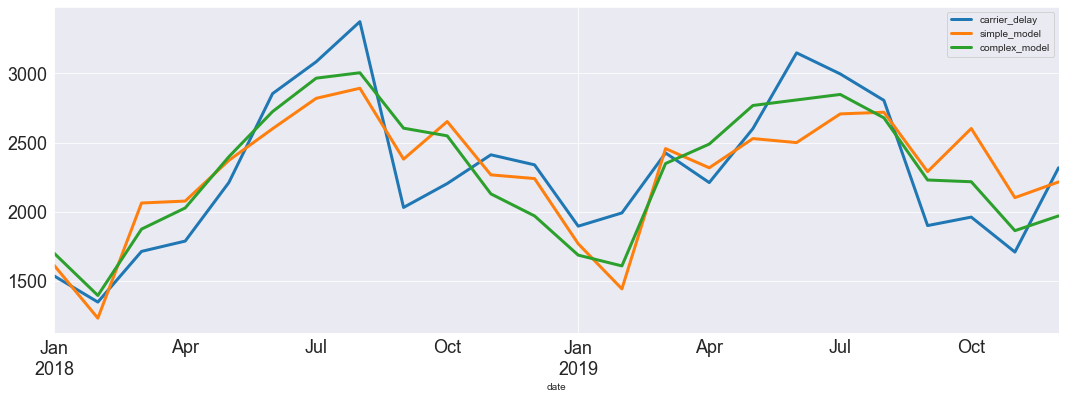

In [7]:
complex_model = (
    LinearRegression()
    .fit(flight_delays[["total_flights", "temprature_movement"]], flight_delays["carrier_delay"])
)

flight_delays["complex_model"] = complex_model.predict(flight_delays[["total_flights", "temprature_movement"]])

(flight_delays[["carrier_delay", "simple_model", "complex_model"]]
 .plot(figsize=(18, 6), lw=3, fontsize=18)
);

### The journey does not end here. We still have not solved the problem.

### This how our model looks like

<img src="src/complex_model_rep.png" width="500" style="margin-left:auto; margin-right:auto"/>

### But we need it to be in this form to support decision making

<img src="src/decision_making.png" width="500" style="margin-left:auto; margin-right:auto"/>
